## LBP

Para las imágenes suministradas
1. Implementar un extractor de características LBP básico (sin uniformidad, 8 vecinos)
2. Realizar el histograma de características LBP de la imagen
3. Comparar los histogramas

In [1]:
import cv2 as cv
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 6)

import glob

### Extractor LBP básico

In [2]:
neighbours = [( 0,-1, 1)
            , ( 1,-1, 2)
            , ( 1, 0, 4)
            , ( 1, 1, 8)
            , ( 0, 1, 16)
            , (-1, 1, 32)
            , (-1, 0, 64)
            , (-1,-1, 128)
            ]

def new_pixel_lbp(img, r, c):
    pixel = img[r,c]
    new_pixel = 0

    for delta_row, delta_col, power in neighbours:
        vecino = img[r + delta_row, c + delta_col]
        if vecino >= pixel:
            new_pixel = new_pixel + power
    return new_pixel

def lbp(img):
    h, w = img.shape
    output = np.zeros((h, w))

    for row in np.arange(1, h-1):
        for column in np.arange(1, w-1):
            output[row, column] = new_pixel_lbp(img, row, column)
    
    return output

### LBP de las imágenes

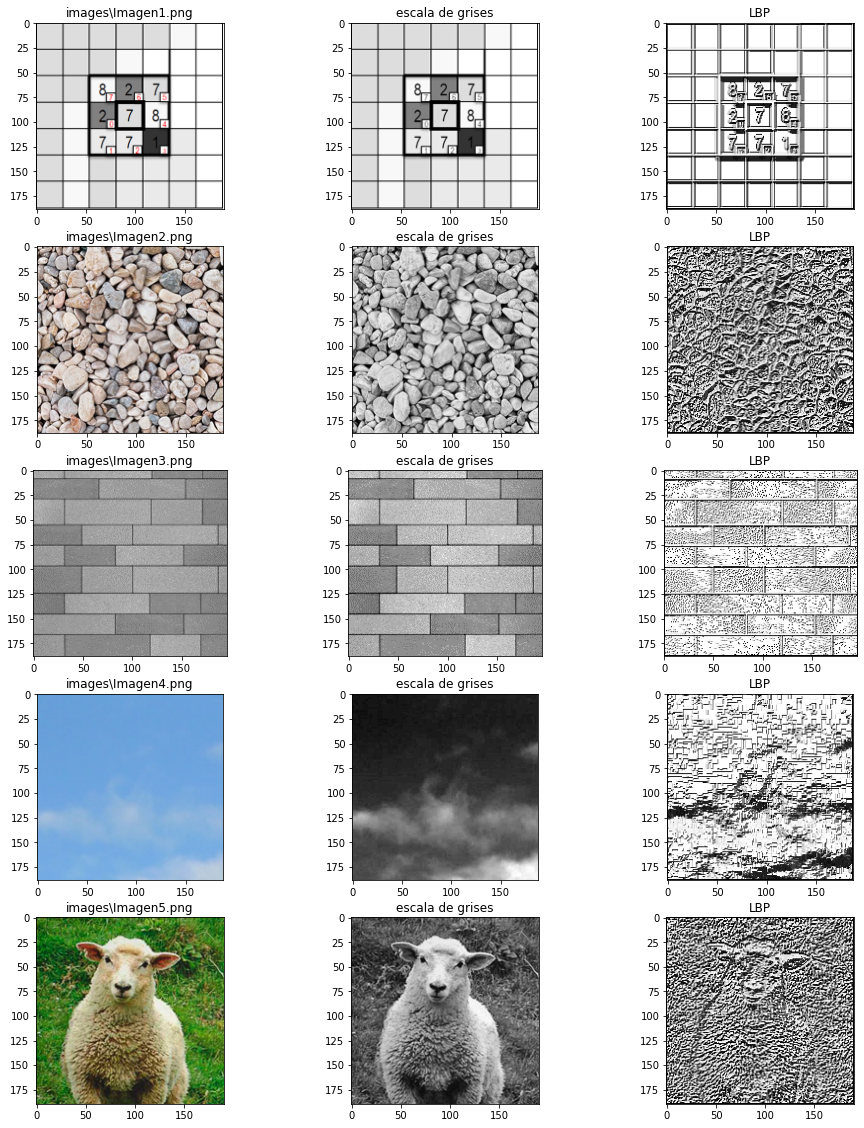

In [3]:
# Imágenes
image_names = glob.glob('images/Imagen*.png')
i=1; n_rows = len(image_names)+1
plt.figure(figsize=[16, 4 * n_rows])

i=0
for image_name in image_names:
    img = cv.imread(image_name,cv.IMREAD_COLOR)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB) # para plotear
    img_gray= cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img_lbp = lbp(img_gray)

    titulo = f'{image_name}'
    i+=1; plt.subplot(n_rows,3,i);plt.imshow(img_rgb);plt.title(titulo);
    i+=1; plt.subplot(n_rows,3,i);plt.imshow(img_gray, cmap='gray');plt.title('escala de grises');
    i+=1; plt.subplot(n_rows,3,i);plt.imshow(img_lbp, cmap='gray');plt.title('LBP');

plt.show()



### Histogramas

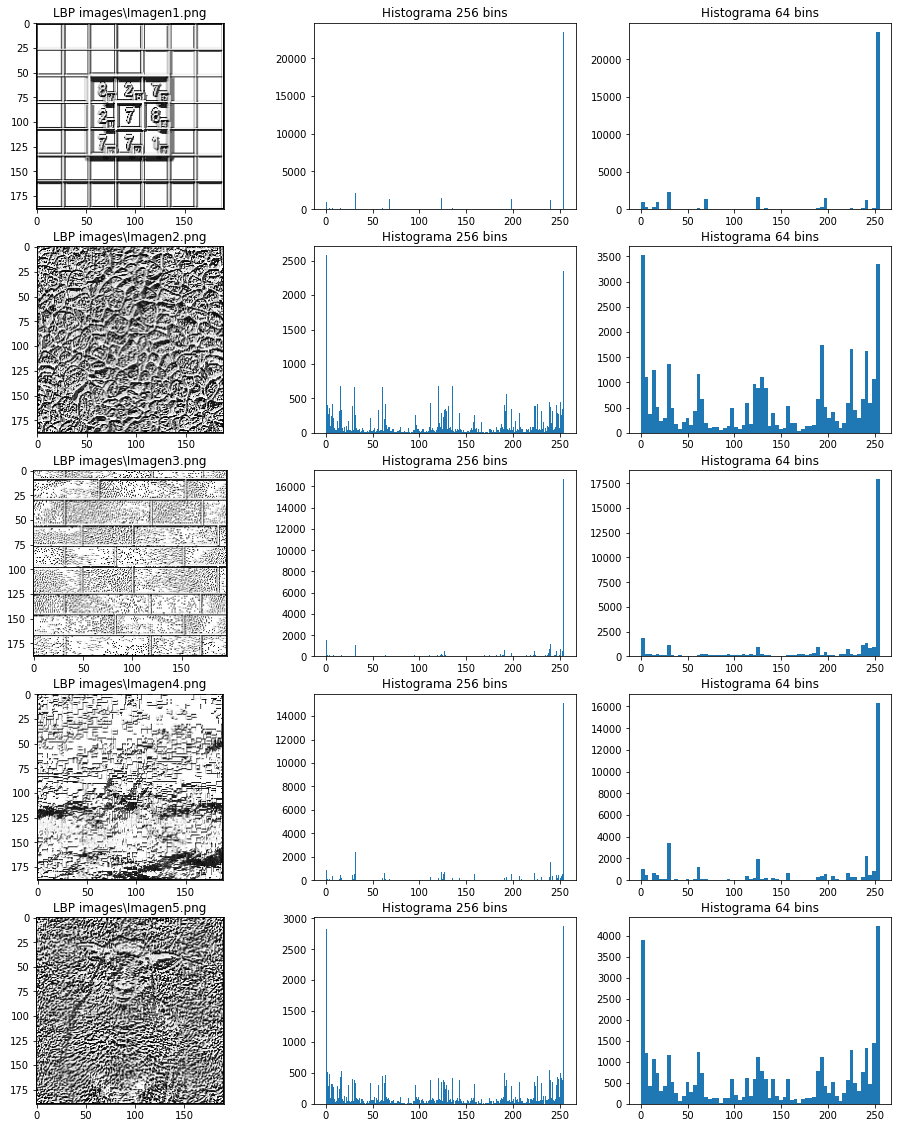

In [5]:
# Imágenes
image_names = glob.glob('images/Imagen*.png')
i=1; n_rows = len(image_names)+1
plt.figure(figsize=[16, 4 * n_rows])

i=0
for image_name in image_names:
    img_gray = cv.imread(image_name,cv.IMREAD_GRAYSCALE)
    img_lbp = lbp(img_gray)

    i+=1; plt.subplot(n_rows,3,i);plt.imshow(img_lbp, cmap='gray');plt.title(f'LBP {image_name}');

    for b in (256, 64):
        hist, bins = np.histogram(img_lbp.ravel(),b)
        i+=1; plt.subplot(n_rows,3,i); plt.hist(bins[:-1], bins, weights=hist)
        plt.title(f'Histograma {b} bins')

plt.show()


### Conclusiones

- En los histogramas de LBP de las imágenes 1 (grilla), 3 (ladrillos) y 4 (nubes) se observa uniformidad local en casi toda la imagen (los valores se concentran en el último bin). Los bins intermedios muestran las diferencias de textura en los bordes de la grilla, los ladrillos, y las nubes respectivamente. En el caso de los ladrillos y de las nubes se ven valores a lo largo de todo el histograma porque ni la textura de los ladrillos ni las nubes son totalmente uniformes. 
- Los histogramas de LBP de las imágenes 2 (piedras) y 4 (oveja) tienen valores y picos a lo largo de todo el rango de bins, lo que representa la textura de las piedras, de la oveja y del pasto de las respectivas imágenes. En particular hay muchos valores en el primer y el último bin mostrando uniformidad local (por ejemplo el pecho de la oveja) o fuertes cambios locales (por ejemplo los contornos de la oveja o de las piedras).